# Quantitative Finance Model using Donadio and Ghosh Learn Algorithmic Trading Chapter 2 SMA & EMA Examples
### David Lowe
### August 2, 2022

NOTE: This script is for learning purposes only and does not constitute a recommendation for buying or selling any stock mentioned in this script.

SUMMARY: This project aims to construct and test an algorithmic trading model and document the end-to-end steps using a template.

INTRODUCTION: This script aims to replicate the SMA and EMA examples found in chapter two of the book Learn Algorithmic Trading by Sebastien Donadio and Sourav Ghosh. The script seeks to validate the Python environment and package requirements for running these code examples successfully. The eventual goal is to integrate various example code segments from the book into an end-to-end algorithmic trading system.

Dataset ML Model: Time series analysis with numerical attributes

Dataset Used: Sharadar US Equities and Fund Prices from Quandl/Nasdaq Data Link

Source and Further Discussion of the Code Examples: https://github.com/PacktPublishing/Learn-Algorithmic-Trading

# Task 1 - Prepare Environment

## 1.a) Load the required packages and modules

In [1]:
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import statistics as stats
# import seaborn as sns

## 1.b) Set up the controlling parameters and functions

In [2]:
# Specify the key modeling parameters below
DATA_STORE = '../sharadar.h5'
ticker_symbol = 'GOOGL'

MA_WINDOW = 20

MODEL_START_DATE = date(2012, 1, 1)
print("Starting date for the model:", MODEL_START_DATE)

# MODEL_END_DATE = datetime.now().date()
MODEL_END_DATE = date(2021, 12, 31)
print("Ending date for the model:", MODEL_END_DATE)

Starting date for the model: 2012-01-01
Ending date for the model: 2021-12-31


# Task 2 - Acquire and Pre-Process Data

## Instead of using pandas-datareader like in the book example, this script will use a home-grown data source.

In [3]:
with pd.HDFStore(DATA_STORE) as store:
    goog_data = (store['quandl/sharadar/sep'].loc[[ticker_symbol], ['open', 'high', 'low', 'closeadj', 'volume']])
goog_data.reset_index(level=0, inplace=True)
goog_data.sort_index(inplace=True)
goog_data = goog_data[MODEL_START_DATE:MODEL_END_DATE]
goog_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2012-01-03 to 2021-12-31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ticker    2517 non-null   object 
 1   open      2517 non-null   float64
 2   high      2517 non-null   float64
 3   low       2517 non-null   float64
 4   closeadj  2517 non-null   float64
 5   volume    2517 non-null   float64
dtypes: float64(5), object(1)
memory usage: 137.6+ KB


# Task 3 - Build model with the Simple Moving Average indicator

In [4]:
close = goog_data['closeadj']
history = [] # to track a history of prices
sma_values = [] # to track simple moving average values

for close_price in close:
    history.append(close_price)
    if len(history) > MA_WINDOW: # we remove oldest price because we only average over last 'time_period' prices
        del (history[0])
    sma_values.append(stats.mean(history))

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
sma = goog_data['Simple20DayMovingAverage']
print(sma.head())

date
2012-01-03    16.652000
2012-01-04    16.688000
2012-01-05    16.622667
2012-01-06    16.533750
2012-01-09    16.342400
Name: Simple20DayMovingAverage, dtype: float64


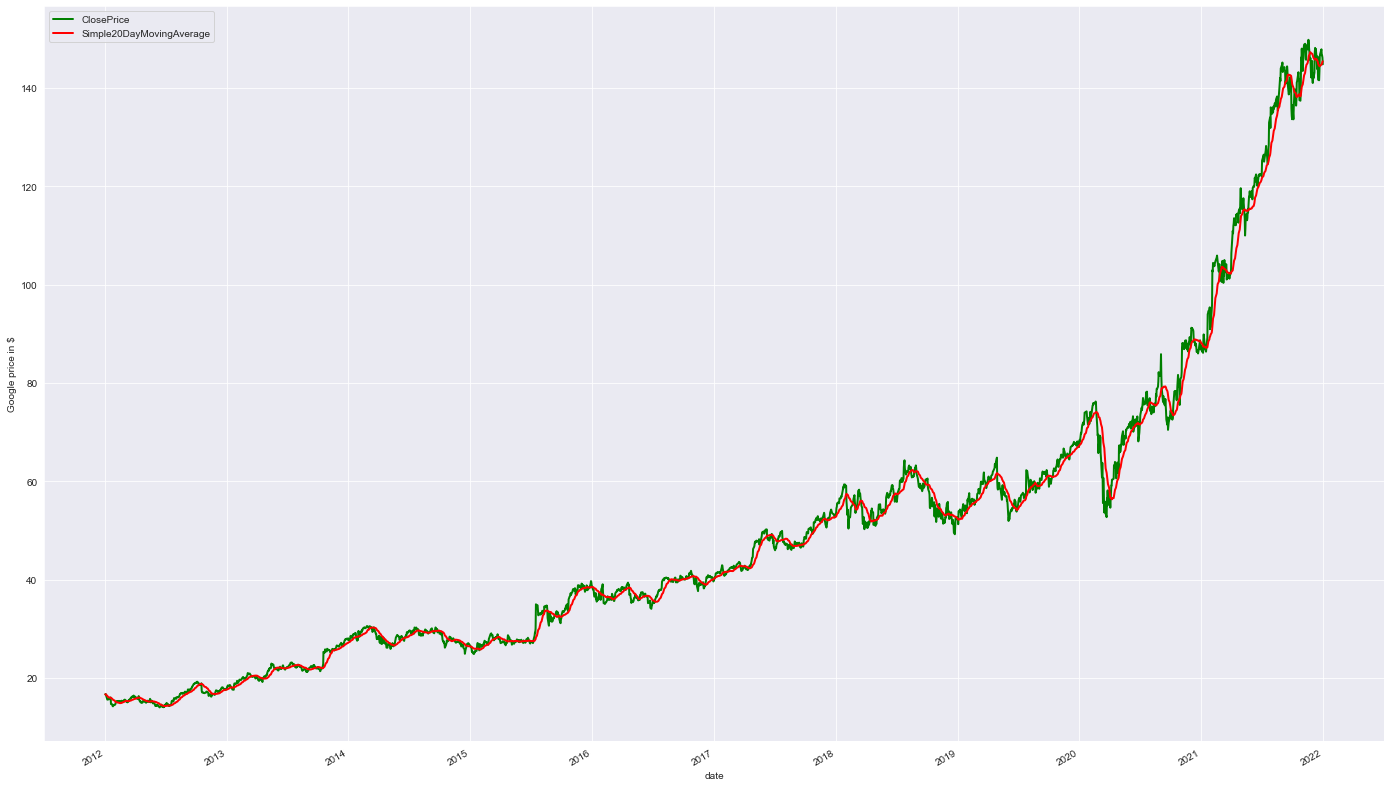

In [5]:
fig = plt.figure(figsize=(24, 15))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

# Task 4 - Build model with the Exponential Moving Average indicator

In [6]:
close = goog_data['closeadj']
K = 2 / (MA_WINDOW + 1) # smoothing constant
ema_p = 0

ema_values = [] # to hold computed EMA values
for close_price in close:
    if ema_p == 0: # first observation, EMA = current-price
        ema_p = close_price
    else:
        ema_p = (close_price - ema_p) * K + ema_p
    ema_values.append(ema_p)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']
print(ema.head())

date
2012-01-03    16.652000
2012-01-04    16.658857
2012-01-05    16.642966
2012-01-06    16.607160
2012-01-09    16.509049
Name: Exponential20DayMovingAverage, dtype: float64


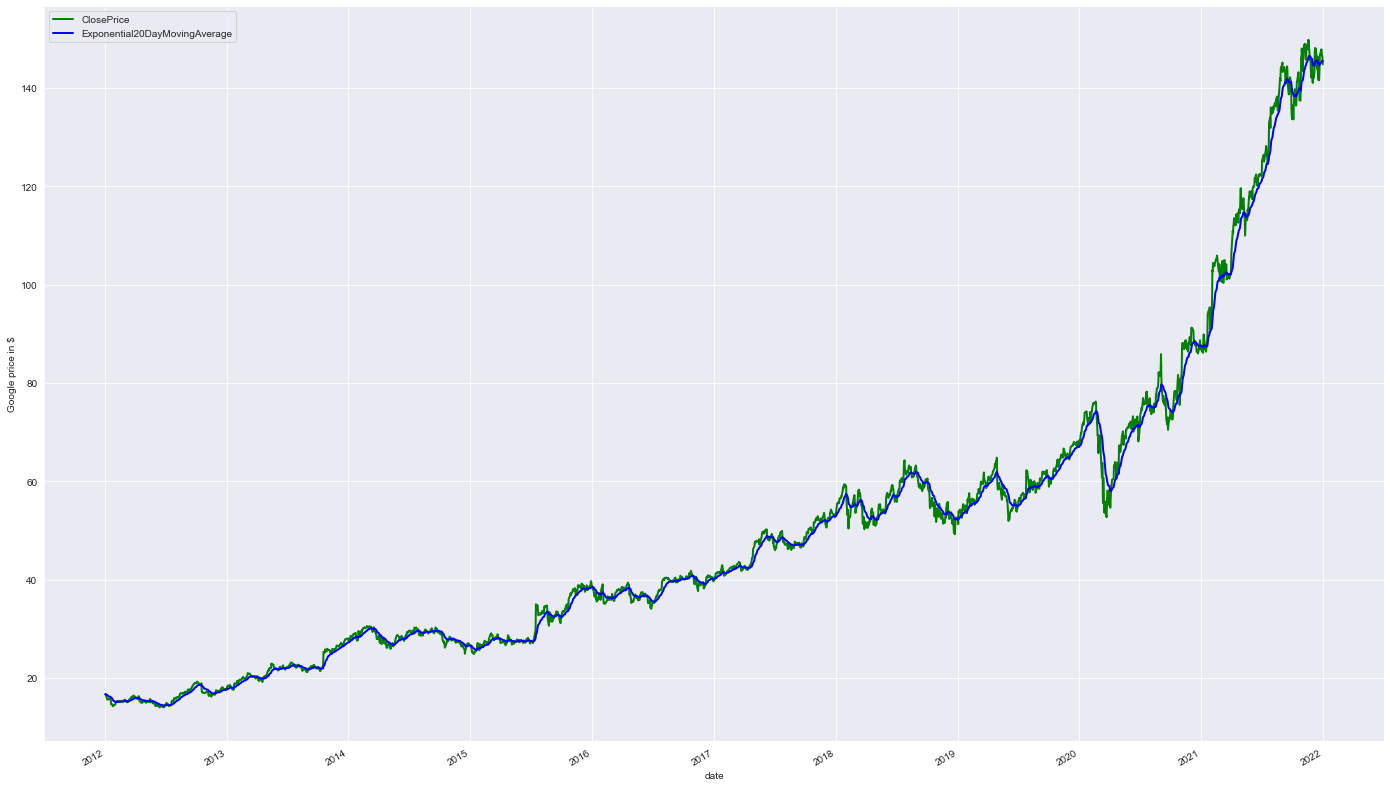

In [7]:
fig = plt.figure(figsize=(24, 15))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.show()